## Supply Dataset

In [198]:
# Main Library
from datetime import datetime

import pandas as pd
import numpy as np

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Acquisition

In [199]:
# Load Dataset
dataset = pd.read_csv("dataset/dataset-supply.csv", parse_dates=['Ship Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship Date     8092 non-null   datetime64[ns]
 1   Month         8092 non-null   object        
 2   Year          8092 non-null   int64         
 3   Ship Mode     8092 non-null   object        
 4   Area          8092 non-null   object        
 5   Region        8092 non-null   object        
 6   Category      8092 non-null   object        
 7   Sub-Category  8092 non-null   object        
 8   Sold          8092 non-null   int64         
 9   Profit        8092 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 632.3+ KB


In [200]:
# Show Original Dataset
print(dataset)

      Ship Date     Month  Year       Ship Mode        Area Region         Category Sub-Category  Sold   Profit
0    2016-11-11  November  2016    Second Class        Jawa  South        Furniture    Bookcases   270   503000
1    2016-11-11  November  2016    Second Class     Sumatra  South        Furniture       Chairs   740  2635000
2    2016-06-16      Juni  2016    Second Class        Bali   West  Office Supplies       Labels    20    82500
3    2015-10-18   Oktober  2015  Standard Class       Papua  South  Office Supplies      Storage    30    30200
4    2014-06-14      Juni  2014  Standard Class    Sulawesi   West        Furniture  Furnishings    50   170100
...         ...       ...   ...             ...         ...    ...              ...          ...   ...      ...
8087 2014-01-23   Januari  2014    Second Class    Sulawesi  South        Furniture  Furnishings    30    49300
8088 2017-03-03     Maret  2017  Standard Class  Kalimantan   West        Furniture  Furnishings   100  

### 2. Exploration Data Analysis (EDA)

In [201]:
print("Min Date : ", dataset['Ship Date'].min())
print("Max Date : ", dataset['Ship Date'].max())

Min Date :  2014-01-07 00:00:00
Max Date :  2017-12-31 00:00:00


In [202]:
print(dataset['Month'].unique())

['November' 'Juni' 'Oktober' 'April' 'Desember' 'Mei' 'September'
 'Januari' 'Juli' 'Maret' 'Februari' 'Agustus']


In [203]:
dataset['Year'].sort_values().unique()

array([2014, 2015, 2016, 2017])

In [204]:
print(dataset['Ship Mode'].sort_values().unique())

['First Class' 'Same Day' 'Second Class' 'Standard Class']


In [205]:
print(dataset['Area'].sort_values().unique())

['Bali' 'Jawa' 'Kalimantan' 'Papua' 'Sulawesi' 'Sumatra']


In [206]:
print(dataset['Region'].sort_values().unique())

['Central' 'East' 'South' 'West']


In [207]:
print(dataset['Category'].sort_values().unique())

['Furniture' 'Office Supplies' 'Technology']


In [208]:
print(dataset['Sub-Category'].sort_values().unique())

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


In [209]:
print("Feature Sold")
print("Min Value    : ", dataset['Sold'].min())
print("Max Value    : ", dataset['Sold'].max())
print("Avg Value    : ", dataset['Sold'].mean().round(2))

Feature Sold
Min Value    :  10
Max Value    :  17500
Avg Value    :  230.09


In [210]:
print("Feature Profit")
print("Min Value    : ", dataset['Profit'].min())
print("Max Value    : ", dataset['Profit'].max())
print("Avg Value    : ", dataset['Profit'].mean().round(2))

Feature Profit
Min Value    :  0
Max Value    :  100799800
Avg Value    :  654596.49


In [211]:
np.round(dataset["Sold"].mean(),2)

230.09

### 3. Data Praprocess

In [212]:
df_area = dataset.groupby("Area")[["Sold"]].aggregate("sum").reset_index().sort_values("Sold", ascending=False)
df_area


,Area,Sold
3,Papua,388360
2,Kalimantan,360940
4,Sulawesi,347260
5,Sumatra,269180
1,Jawa,251500
0,Bali,244660


In [213]:
df_area["Sold"].sum()

1861900

In [214]:
df_area["Percent"] = (df_area["Sold"] / df_area["Sold"].sum()) * 100
df_area

,Area,Sold,Percent
3,Papua,388360,20.858263
2,Kalimantan,360940,19.385574
4,Sulawesi,347260,18.650841
5,Sumatra,269180,14.457275
1,Jawa,251500,13.507707
0,Bali,244660,13.140341


In [215]:
df_area["Percent"].sum()

100.0

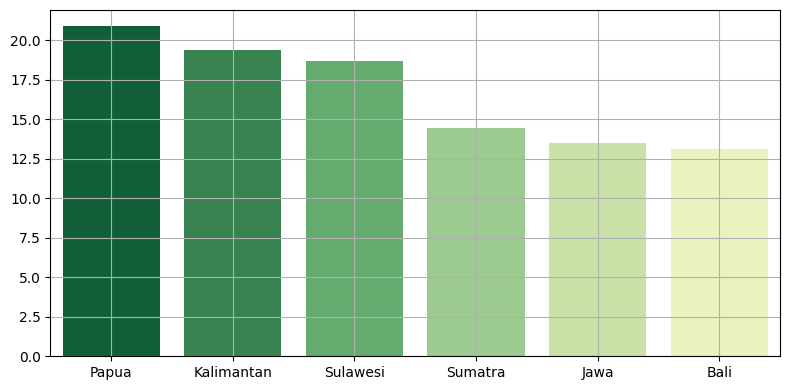

In [216]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_area, x="Area", y="Percent", hue="Area", palette="YlGn_r")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

In [217]:
df_year = dataset.groupby("Year")["Sold"].aggregate("sum").reset_index().sort_values("Year", ascending=True)
df_year

,Year,Sold
0,2014,353140
1,2015,395380
2,2016,516500
3,2017,596880


In [218]:
df_year["Sold"].sum()

1861900

In [219]:
df_year["Percent"] = (df_year["Sold"] / df_year["Sold"].sum()) * 100

In [220]:
df_year

,Year,Sold,Percent
0,2014,353140,18.966647
1,2015,395380,21.235297
2,2016,516500,27.740480
3,2017,596880,32.057576


In [221]:
df_year["Percent"].sum()

100.0

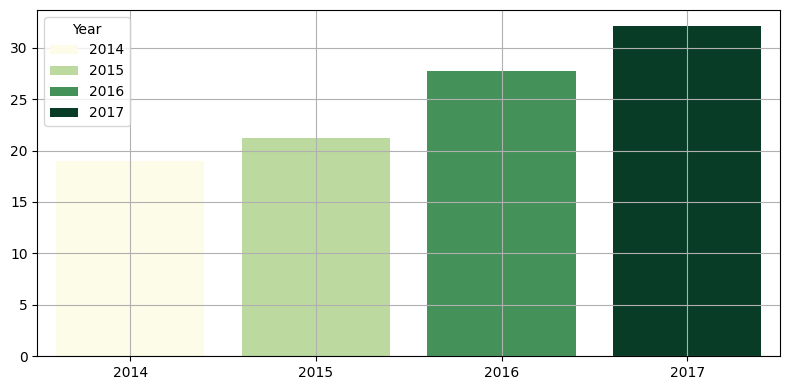

In [222]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_year, x="Year", y="Percent", hue="Year", palette="YlGn")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

In [223]:
df_region = dataset.groupby("Region")["Sold"].aggregate("sum").reset_index().sort_values("Region", ascending=True)
df_region

,Region,Sold
0,Central,366700
1,East,527760
2,South,304740
3,West,662700


In [224]:
df_region["Sold"].sum()

1861900

In [225]:
df_region["Percent"] = (df_region["Sold"] / df_region["Sold"].sum()) * 100

In [226]:
df_region

,Region,Sold,Percent
0,Central,366700,19.694935
1,East,527760,28.345239
2,South,304740,16.367152
3,West,662700,35.592674


In [227]:
df_region["Percent"].sum()

100.00000000000001

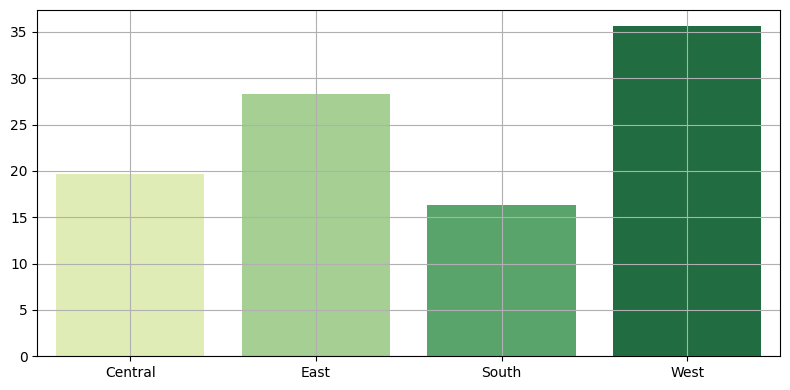

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_region, x="Region", y="Percent", hue="Region", palette="YlGn")

ax.set_title('', fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.grid(True)
# ax.legend(loc="best")

plt.tight_layout()
plt.show()

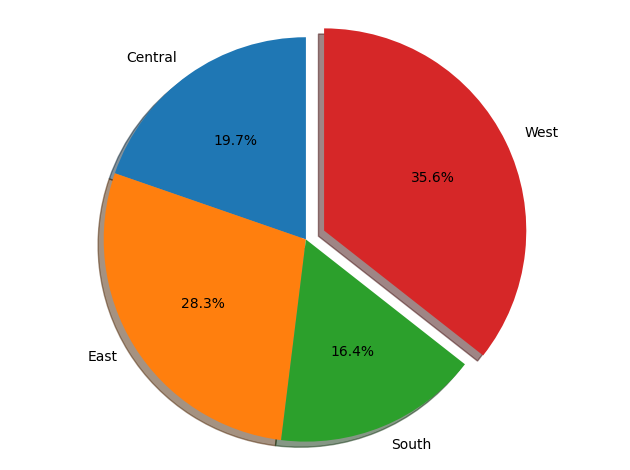

In [237]:
labels = df_region["Region"].unique()
sizes = df_region["Percent"]
explode = (0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.tight_layout()
plt.show()


In [234]:
df_region["Region"].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)